In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams[ 'figure.figsize'] = (10, 8)

In [6]:
def show_image(image, title="Image", cmap_type='gray'):
    plt.imshow( image, cmap=cmap_type)
    pit. title(title)
    plt.axis('off')

def plot_comparison(img_original, img_filtered, img_title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 8), sharex=True, sharey=True)
    ax1.imshow(img_original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(img_filtered, cmap=plt.cm.gray)
    ax2.set_title(img_title_filtered)
    ax2.axis('off')

In [7]:
from skimage.restoration import inpaint
from skimage.transform import resize
from skimage import color

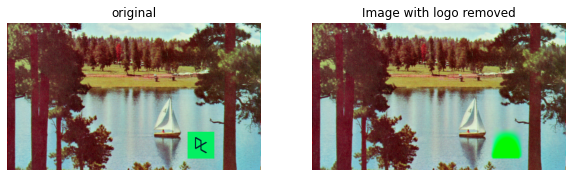

In [8]:
image_with_logo = plt.imread("imlogo.png")

# Initiolize the mask
mask = np.zeros(image_with_logo.shape[:-1])

# Set the pixels where the Logo is to 1
mask[210:272, 360:425] = 1

# Apply inpainting to remove the Logo

image_logo_removed = inpaint.inpaint_biharmonic(image_with_logo,
                                                mask,
                                                multichannel=True)

# show the original and Logo removed images
plot_comparison(image_with_logo, image_logo_removed, "Image with logo removed")

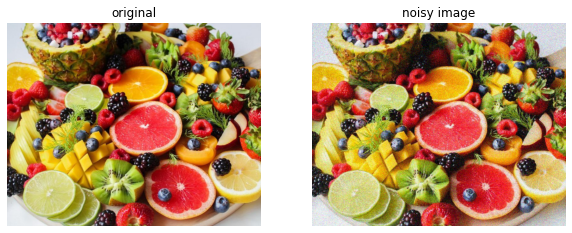

In [9]:
from skimage.util import random_noise
Fruit_image = plt.imread("fruits.jpg")

# add noise to the inoge
noisy_image = random_noise(Fruit_image)

# show th original and resulting image
plot_comparison(Fruit_image, noisy_image,'noisy image')

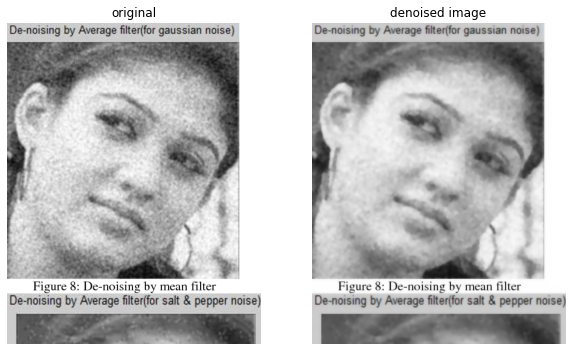

In [10]:
from skimage.restoration import denoise_tv_chambolle
noisy_image = plt.imread( "noisy.jpg")

 

# apply total variation filter denoising
denoised_image = denoise_tv_chambolle(noisy_image, multichannel=True)

# Show the noisy ond denotsed inage
plot_comparison(noisy_image, denoised_image, 'denoised image')

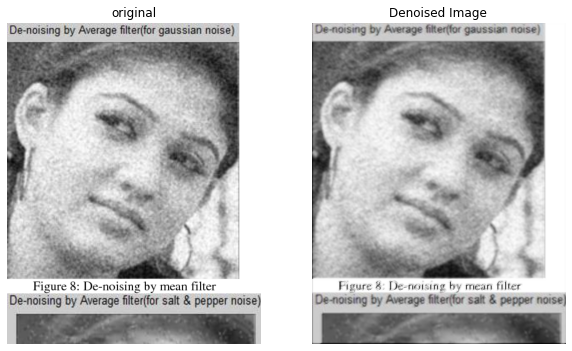

In [11]:
from skimage.restoration import denoise_bilateral
landscape_image = plt.imread("noisy.jpg")

# agply bilateral filter denoising
denoised_image = denoise_bilateral(landscape_image, multichannel=True)

# Show original and resulting images
plot_comparison(landscape_image, denoised_image, "Denoised Image")

C:\Users\User\AppData\Local\Temp/ipykernel_13004/2351509499.py:8: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  segments = slic(face_image, n_segments=102)
C:\Users\User\AppData\Local\Temp/ipykernel_13004/2351509499.py:11: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  segmented_image = label2rgb(segments, face_image,kind='overlay')


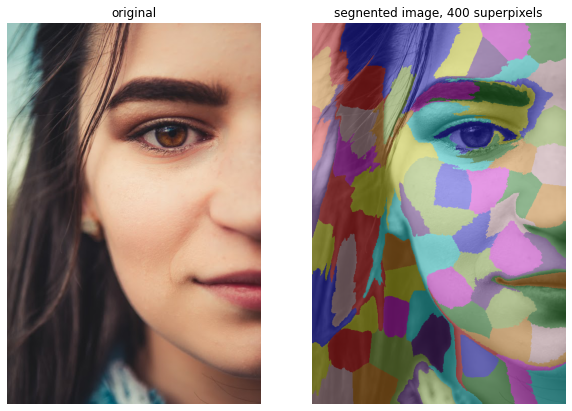

In [12]:
#segmentation
from skimage.segmentation import slic
from skimage.color import label2rgb

face_image = plt.imread("face1.jpg")

# obtain the seqnentation with 49@ regions
segments = slic(face_image, n_segments=102)

# Put segments on top of original image to compare
segmented_image = label2rgb(segments, face_image,kind='overlay')

# Show the segnented image
plot_comparison(face_image, segmented_image, "segnented image, 400 superpixels")

C:\Users\User\AppData\Local\Temp/ipykernel_13004/258073791.py:8: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  segments=slic(img,n_segments=400, compactness=20)
C:\Users\User\AppData\Local\Temp/ipykernel_13004/258073791.py:11: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  segmented_image=label2rgb(segments,img,kind='avg')


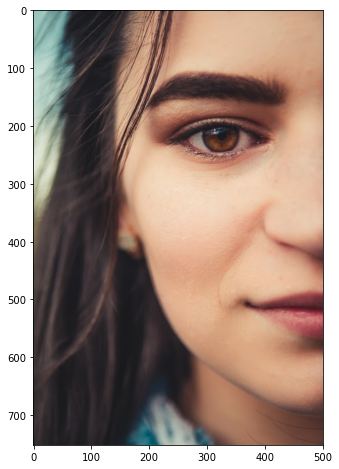

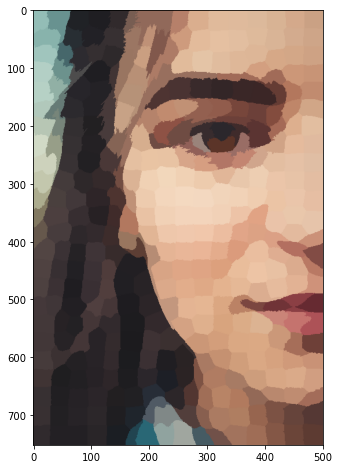

In [13]:
#Segmntation
from skimage.segmentation import slic
from skimage.color import label2rgb
import matplotlib.pyplot as plt
img=plt.imread('face1.jpg')

#obtain the segmentation with 400 regions
segments=slic(img,n_segments=400, compactness=20)

#put segments on top of original image to compare
segmented_image=label2rgb(segments,img,kind='avg')

#Show the segmented image
plt.imshow(img.astype('uint8'))
plt.show()
plt.imshow(segmented_image.astype('uint8'))
plt.show()

In [14]:
#Contouring shapes
def show_image_contour(image, contours):
    plt.Figure()
    for n, contour in enumerate(contours):
        plt.plot(contour[:, 1], contour[:, 0], linewidth=3)
    plt.imshow(image, interpolation='nearest', cmap='gray_r')
    plt.title( 'contours')
    plt.axis("off")

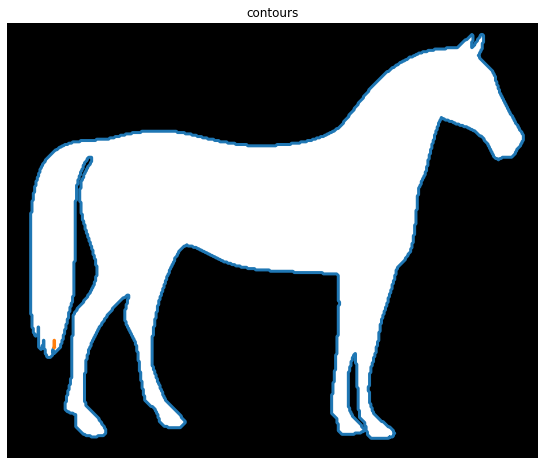

In [15]:
from skimage import measure, data

# obtain the horse inoge
horse_image = data.horse()

# Find the contours with a constant Level value of 0.8
contours = measure.find_contours(horse_image, level=0.8)

# Shows the inage with contours found
show_image_contour(horse_image, contours)

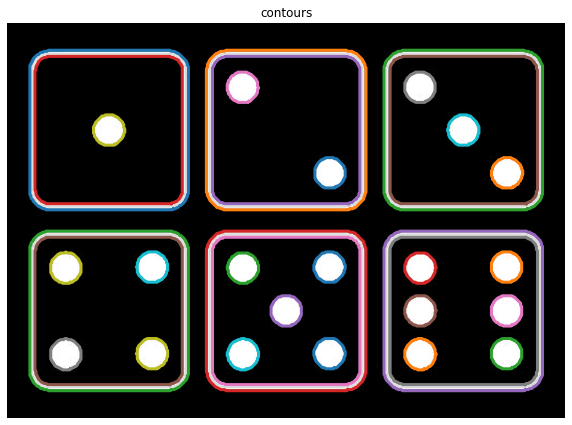

In [16]:
from skimage.io import imread 
from skimage.filters import threshold_otsu

image_dices = imread("diceimg.jpg")

# Nake the inoge grayscale
image_dices = color.rgb2gray(image_dices)

# obtain the optimal thresh value
thresh = threshold_otsu(image_dices)

# Apply thresholding
binary = image_dices > thresh

# Find contours at a constant value of 0.8
contours = measure.find_contours(binary, level=0.8)

# show the inage
show_image_contour( image_dices, contours)

Dice`s dots number: 21 


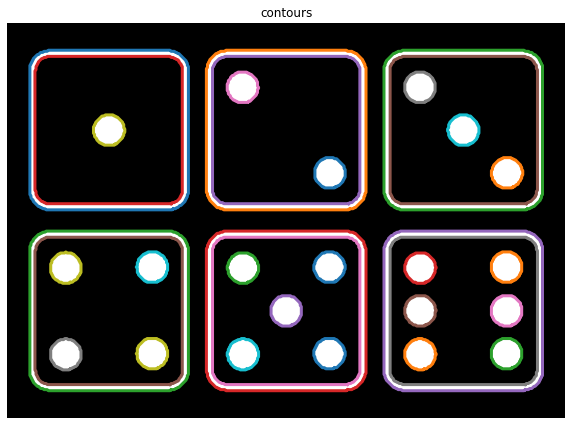

In [17]:
# Create List with the shape of each contour
shape_contours = [cnt.shape[0] for cnt in contours]

# Set 50 as the maximm size of the dots shape
max_dots_shape = 500

# count dots in contours excluding bigger than dots size
dots_contours = [cnt for cnt in contours if np.shape(cnt)[0] < max_dots_shape]

# Shows al contours found
show_image_contour(binary, contours)

# print the dice’s number
print('Dice`s dots number: {} '.format(len(dots_contours)))